# Кластеризация

Как мы уже говорили выше, кластеризация (clustering) является задачей 
разбиения набора данных на группы, называемые кластерами. Цель –
разделить данные таким образом, чтобы точки, находящие в одном и том 
же кластере, были очень схожи друг с другом, а точки, находящиеся в 
разных кластерах, отличались друг от друга.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Кластеризация k-средних

Кластеризация k-средних (k-means) — это метод машинного обучения, который разделяет набор данных на k кластеров таким образом, чтобы каждый объект принадлежал к кластеру с ближайшим центром. Этот метод является одним из самых популярных алгоритмов кластеризации из-за своей простоты и эффективности. 

#### Суть работы

- Сначала выбирается **число кластеров k**.
- После выбора значения k алгоритм k-средних отбирает точки, которые будут представлять **центры кластеров** (cluster centers). 
- Затем для каждой точки данных вычисляется его евклидово **расстояние** до каждого центра кластера. Каждая точка назначается ближайшему центру кластера. 
- Алгоритм вычисляет **центроиды** (centroids) – центры тяжести кластеров. Каждый центроид – это вектор, элементы которого представляют собой средние значения характеристик, вычисленные по всем точкам кластера. Центр кластера смещается в его центроид. *Точки заново назначаются ближайшему центру кластера.** 
- Этапы изменения центров кластеров и переназначения точек **итеративно повторяются** до тех пор, пока границы кластеров и расположение центроидов **не перестанут изменяться**, т.е. на каждой итерации в каждый кластер будут попадать одни и те же точки данных.

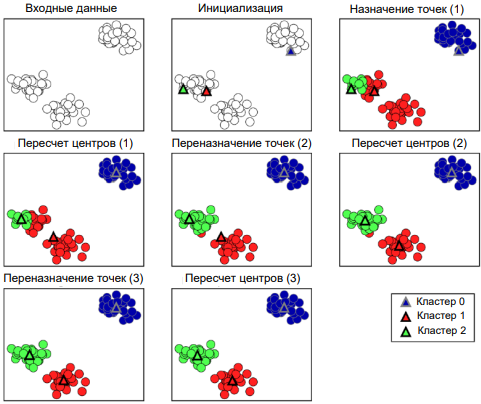 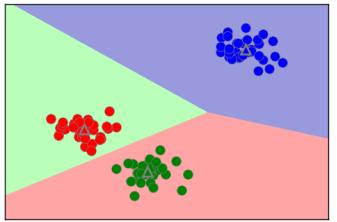

In [2]:
def generate_2d_data(n=20):
    '''Генерация случайного 2д набора точек'''
    x = np.random.rand(n)
    y = np.random.randn(n)  
    arr_2d = []
    for i in range(len(x)):
        arr_2d.append([x[i],y[i]])
    return arr_2d

In [3]:
def only_noise(data_list, label_list):
    noise_list = []
    for i in range(len(label_list)):
        if label_list[i]==-1:
            noise_list.append(data_list[i])
            data_list[i]
    if not noise_list or not data_list:
        return False
    return data_list, noise_list

In [4]:
def show_scatter_2d(list_point, size=7, labels=None, centers=None, show_original=False, have_noise=False):
    '''Отображение диаграммы рассеяния точек 2d с центрами кластеров'''

    x_coor, y_coor = zip(*list_point)
    if show_original:
        plt.figure()
        plt.scatter(x_coor,y_coor, linewidths=size)
    
    # помеченные данные 
    plt.figure()
    
        
    plt.scatter(x_coor, y_coor, linewidths=size, c=labels)
    if have_noise:
        if only_noise(list_point, labels):
            list_point, noise_list = only_noise(list_point,labels)
            x_noise, y_noise = zip(*noise_list)
            plt.scatter(x_noise, y_noise, linewidths=size-2, c='white', label='Шум')
    
    

    if centers is not None:
        if isinstance(centers, np.ndarray):
            centers = [tuple(center) for center in centers]
        
        centers_x, centers_y = zip(*centers)
        plt.scatter(centers_x, centers_y, marker='x', c='red',linewidths=0.25, label='Центры кластеров')

    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


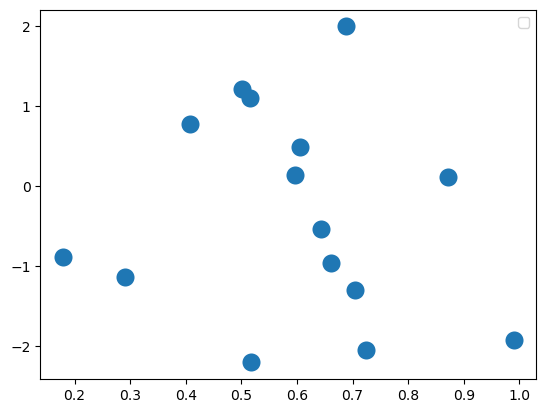

In [6]:
data_2d = generate_2d_data(15)
show_scatter_2d(data_2d)

In [7]:
from sklearn.cluster import KMeans
k_mean = KMeans(n_clusters=3)  # создание модели кластеризаци k-средних с числом кластеров ранвым 3 
k_mean.fit_predict(data_2d) # обучение модели на наборе 

array([1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 2])

In [8]:
# каждая точка теперь принадлежит своему центру кластера:
cluster_centers = np.array(k_mean.cluster_centers_)
print(cluster_centers)

# разделение по кластерам в условных метках
labels = k_mean.labels_
labels

[[ 0.4956273  -0.96582926]
 [ 0.59816311  0.83363112]
 [ 0.74334219 -2.05648645]]


array([1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 2])

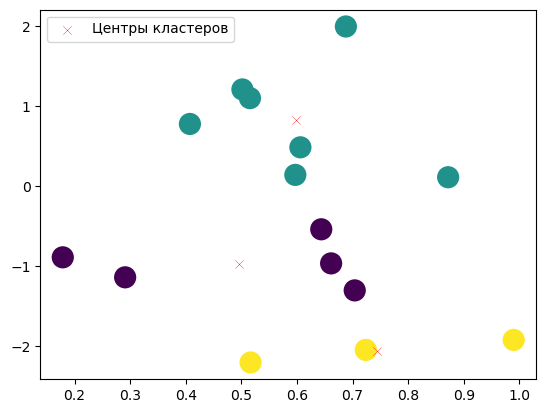

In [9]:
show_scatter_2d(data_2d,labels=labels,size=10, centers=cluster_centers)

### Преимущества кластеризации K-means 
- простота и лёгкость интерпретации
- хорошо работает, когда кластеры имеют приблизительно сферическую форму

### Недостатки
- так как каждый кластер определяется исключительно его центром, то не гарантирует оптимальное решение (K-средних плохо работает с кластерами неправильной формы или различного размера. Он стремится создавать кластеры с примерно одинаковыми радиусами. Не учитывает плотность)

- Чувствительность к начальным значениям

-----------------------------------


## Векторное квантование (рассмотрение k-means кластеризации как декомпозиционного метода)
Несмотря на то что алгоритм k-средних представляет собой алгоритм 
кластеризации, можно провести интересные параллели между 
алгоритмом k-средних и декомпозиционными методами типа PCA и 
NMF, которые мы обсуждали ранее. Возможно, вы помните, что РСА 
пытается найти направления максимальной дисперсии данных, в то 
время как NMF пытается найти аддитивные компоненты, которые часто 
соответствуют «экстремумам» или «группам» данных. 

Оба метода пытаются представить данные в виде суммы некоторых
компонент. Алгоритм k-средних, напротив, пытается представить каждую 
точку данных в пространстве, используя **центр кластера**. Вообразите, что 
каждая точка представлена с помощью только одной компоненты, 
которая задается центром кластера. Рассмотрение алгоритма k-средних
как декомпозиционного метода, в котором каждая точка представлена с 
помощью отдельной компоненты, называется **векторным квантованием**

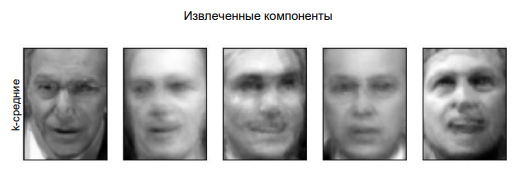

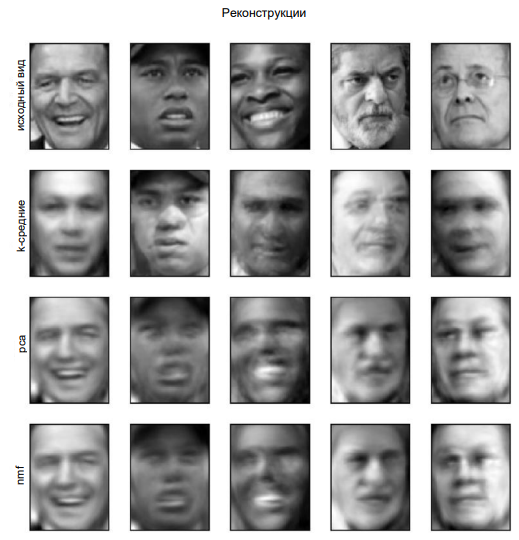

*Интересная деталь векторного квантования с помощью алгоритма k-средних заключается в том, что для представления наших данных мы 
можем использовать число кластеров, намного превышающее число 
входных измерений. Давайте вернемся к данным two_moons. Применив к 
этим данным PCA или NMF, мы ничего примечательного с ними не 
сделаем, поскольку данные представлены двумя измерениями*

Принадлежность к кластерам:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


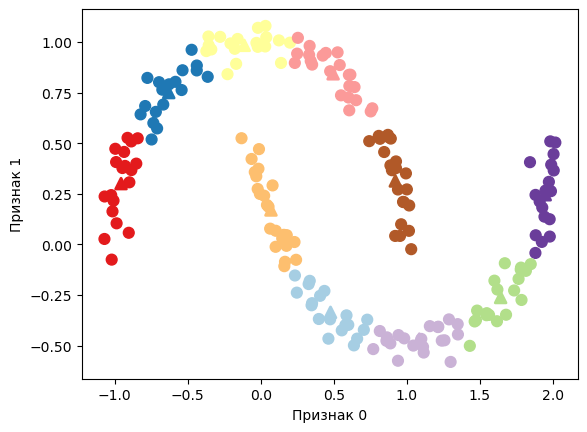

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
 marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
print("Принадлежность к кластерам:\n{}".format(y_pred))

Применив это 10-мерное представление, теперь мы можем отделить эти два скопления 
данных в виде полумесяцев с помощью линейной модели, что было бы 
невозможным, если бы использовали два исходных признака. Кроме того, можно получить еще более выразительное представление данных, используя расстояния до каждого центра кластера в качестве признаков.

## Агломеративная кластеризация

*Agglomerative clustering* относится к
семейству алгоритмов кластеризации, в основе которых лежат
одинаковые принципы: **алгоритм начинает свою работу с того, что 
каждую точку данных заносит в свой собственный кластер и по мере
выполнения объединяет два наиболее схожих между собой кластера дотех пор, пока не будет удовлетворен определенный критерий остановки**

Критерий остановки, реализованный в scikit-learn – это **количество 
кластеров**, поэтому схожие между собой кластеры объединяются до тех 
пор, пока не останется заданное число кластеров. 

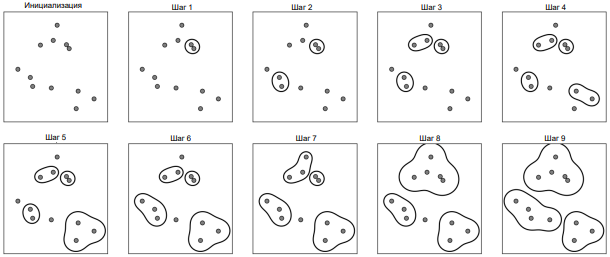

Есть несколько **критериев связи*** (linkage), которые задают точный *способ измерения 
«наиболее схожего кластера»*. В основе этих критериев лежит расстояние 
между двумя существующими кластерами.
В scikit-learn реализованы следующие три критерия:

- ward

метод по умолчанию **ward** (метод Варда) выбирает и объединяет два 
кластера так, чтобы прирост дисперсии внутри кластеров был 
минимальным. Часто этот критерий приводит к получению кластеров
относительно одинакового размера.

- average

метод **average** (метод средней связи) объединяет два кластера, 
которые имеют наименьшее среднее значение всех расстояний, 
измеренных между точками двух кластеров.

- complete

метод **complete** (метод полной связи или метод максимальной связи) 
объединяет два кластера, которые имеют наименьшее расстояние между 
двумя их самыми удаленными точками.

In [13]:
from sklearn.cluster import AgglomerativeClustering
aggl = AgglomerativeClustering(n_clusters=3)
aggl_predict = aggl.fit_predict(data_2d)
aggl_predict

array([0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


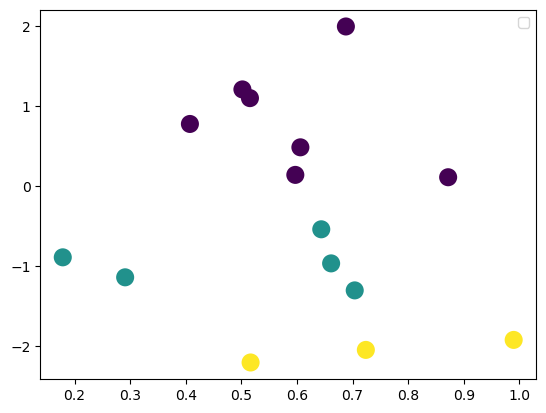

In [14]:
show_scatter_2d(data_2d, labels=aggl_predict)

Результатом агломеративной кластеризации является **иерархическая
кластеризация** (hierarchical clustering). Кластеризация выполняется 
итеративно, и каждая точка совершает путь от отдельной точки-кластера
до участника итогового кластера. На каждом промежуточном шаге
происходит кластеризация данных (с разным количеством кластеров). 
Иногда полезно сразу взглянуть на все возможные кластеризации. 

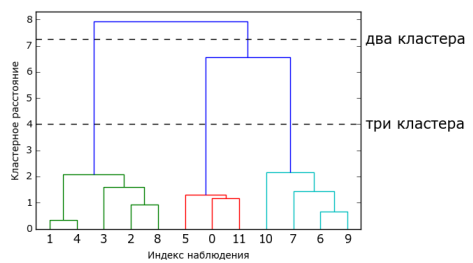

## DBSCAN

Еще один очень полезный алгоритм кластеризации – **DBSCAN** (densitybased spatial clustering of applications with noise – *плотностный алгоритм кластеризации пространственных данных с присутствием шума*). 

Основные преимущества алгоритма DBSCAN:

- **не нужно заранее задавать количество кластеров** 
- **алгоритм может выделить кластеры сложной формы**
- **способен определить точки, которые не принадлежат какому-либо кластеру (шум)**

*DBSCAN работает немного медленнее, чем алгоритм агломеративной
кластеризации и алгоритм k-средних, но также может масштабироваться 
на относительно большие наборы данных*

DBSCAN определяет точки, расположенные в «густонаселенных»
областях пространства характеристик, когда многие точки данных 
расположены близко друг к другу. Эти области называются плотными
(dense) областями пространства характеристик.

**Идея алгоритма DBSCAN заключается в том, что кластеры образуют плотные области 
данных, которые отделены друг от друга относительно пустыми 
областями.**

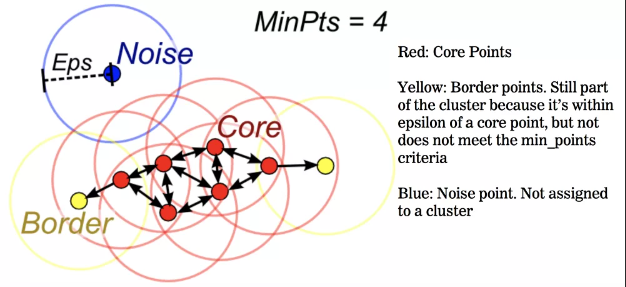

Точки, находящиеся в плотной области, называются **ядровыми 
примерами** (core samples) или **ядровыми точками** (core points).

Алгоритм DBSCAN имеет два параметра: **min_samples** и **eps**.

*Если по крайней мере min_samples точек находятся в радиусе окрестности eps рассматриваемой 
точки, то эта точка классифицируется как ядровая. Ядровые точки, 
расстояния между которыми не превышают радиус окрестности eps,
помещаются алгоритмом DBSCAN в один и тот же кластер*

На старте алгоритм выбирает произвольную точку. Затем он находит 
все точки, удаленные от стартовой точки на расстоянии, не 
превышающем радиус окрестности *eps*. Если множество точек, 
находящихся в пределах радиуса окрестности eps, меньше значения 
*min_samples*, стартовая точка помечается как **шум** (noise), это означает, 
что она не принадлежит какому-либо кластеру. Если это множество
точек больше значения *min_samples*, стартовая точка помечается как
ядровая и ей назначается метка нового кластера. Затем посещаются все 
соседи этой точки (находящиеся в пределах eps). Если они еще не были 
присвоены кластеру, им присваивается метка только что созданного
кластера. Если они являются ядровыми точками, поочередно посещаются
их соседи и т.д. Кластер растет до тех пор, пока не останется ни одной 
ядерной точки в пределах радиуса окрестности eps. Затем выбирается 
другая точка, которая еще не была посещена, и повторяется та же самая 
процедура.

В итоге получаем три вида точек: **ядровые точки**, точки, так 
называемые **пограничные тоmчки** (boundary points) и **шумовые точки**. 

*При многократном применении алгоритма DBSCAN к конкретному
набору данных результаты кластеризации ядровых точек будут всегда 
одинаковыми, при этом одни и те же точки всегда будут помечаться как 
шумовые. Однако пограничная точка может быть соседом для ядровых 
точек из нескольких кластеров. Поэтому кластерная принадлежность
пограничных точек зависит от порядка посещения точек. Как правило, 
существует лишь несколько пограничных точек, поэтому эта слабая 
зависимость результатов кластеризации от порядка посещения точек не 
имеет значения*

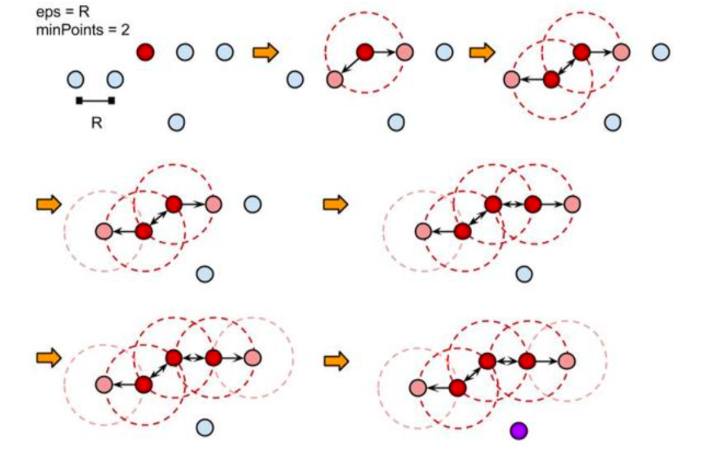

- **eps (радиус окрестности)**

*Определяет "близость" точек друг к другу. Маленькое значение eps означает, что ядерные точки могут быть отсутствующими, и все точки могут быть помечены как шум. Большое значение eps приведет к объединению всех точек в один кластер.*

- **min_samples (минимальное количество точек в окрестности)**

*Определяет минимальный размер кластера. Увеличение min_samples может привести к классификации меньших кластеров как шум и уменьшению количества ядерных точек.*


---------------
Изменение **eps** влияет на размеры кластеров, и его значение определяет, будут ли несколько кластеров объединены. Увеличение **min_samples** увеличит количество шумовых точек и уменьшит количество ядерных точек в кластерах.

Подбор оптимального значения **eps** становится проще после масштабирования данных, чтобы убедиться, что все характеристики имеют одинаковый масштаб (StandardScaler или MinMaxScaler)

----------------
Таким образом, эти параметры позволяют настраивать чувствительность алгоритма к плотности данных и определять размеры кластеров и шумовых точек в результате кластеризации.

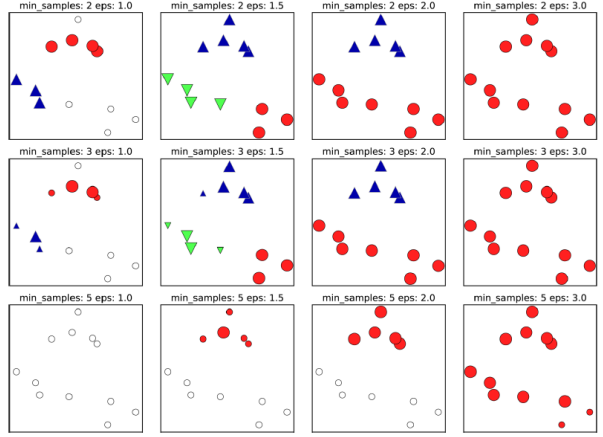

In [15]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
data = generate_2d_data(20)
dbscan_predict = dbscan.fit_predict(data)
dbscan_predict


array([ 0, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1, -1, -1,
       -1, -1,  0], dtype=int64)

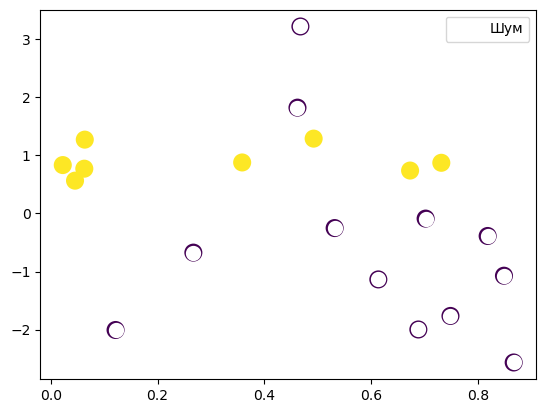

In [16]:
show_scatter_2d(data,labels=dbscan_predict, have_noise=True)

In [17]:
def all_clustering(n_points, n_clusters,size_point=5):
    data = generate_2d_data(n_points)
    show_scatter_2d(data, size=size_point)
    k_means = KMeans(n_clusters=n_clusters)
    aggl = AgglomerativeClustering(n_clusters=n_clusters-1)
    dbscan = DBSCAN(min_samples=4, eps=0.4)
    clustering = [k_means, aggl, dbscan]
    for alg in clustering:
        labels = alg.fit_predict(data)
        show_scatter_2d(data,size=size_point,labels=labels,have_noise=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


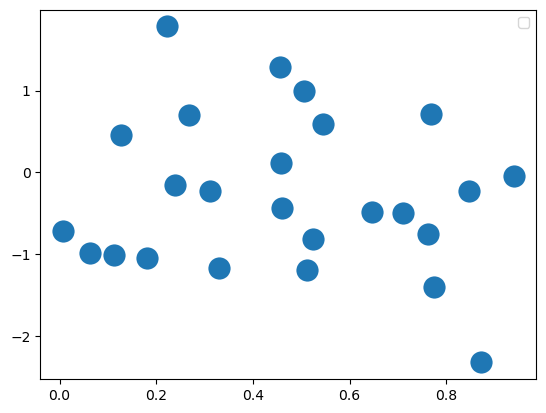

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


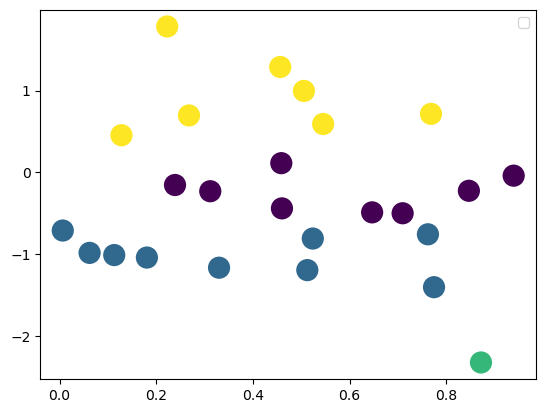

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


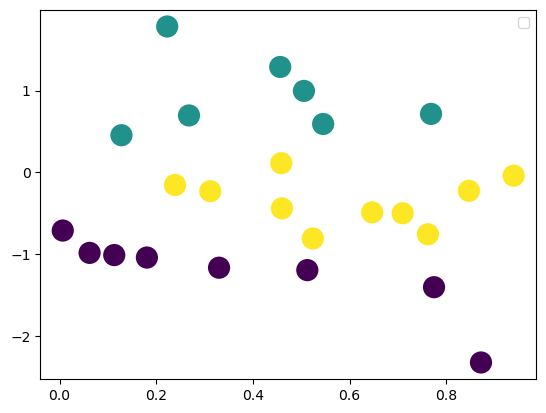

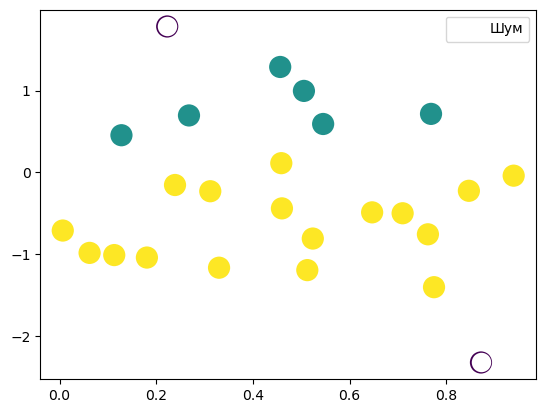

In [18]:
all_clustering(25,4, size_point=10)

## Сравнение и оценка качества алгоритмов кластеризации 

###  (выбор лучшего числа кластеров для k-means)

**WCSS** расшифровывается как "Within-Cluster Sum of Squares" **(Сумма квадратов внутри кластера)**. Это показатель, используемый в алгоритмах кластеризации, таких как k-means, для оценки того, насколько объекты внутри одного кластера близки друг к другу.

В методе k-means цель состоит в минимизации WCSS. Этот показатель измеряет сумму квадратов расстояний от каждой точки данных внутри кластера до центроида этого кластера. Чем меньше WCSS, тем лучше, поскольку это означает, что объекты внутри кластера находятся ближе друг к другу.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


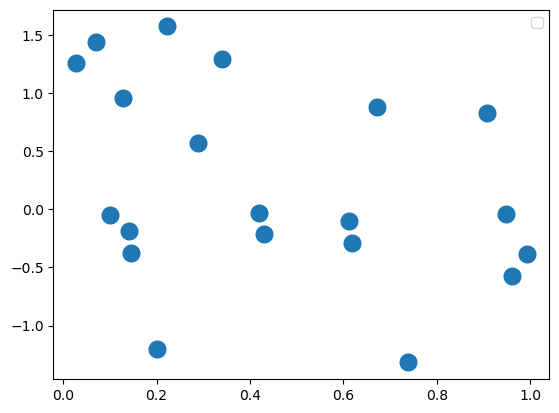

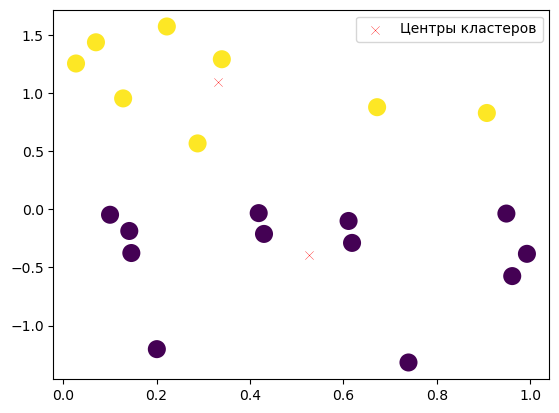

4.827735155617602


In [19]:
new_data = generate_2d_data(20)
show_scatter_2d(new_data)

k_mean = KMeans(n_clusters=2)
predict_kmean = k_mean.fit_predict(new_data)
centers_kmean = k_mean.cluster_centers_

# сумма квадратов внутри кластеров
wcss = k_mean.inertia_

show_scatter_2d(new_data,labels=predict_kmean, centers=centers_kmean)
print(wcss)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


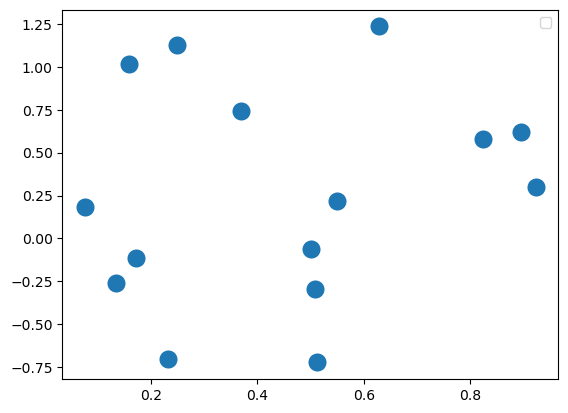

C:\Users\dermi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


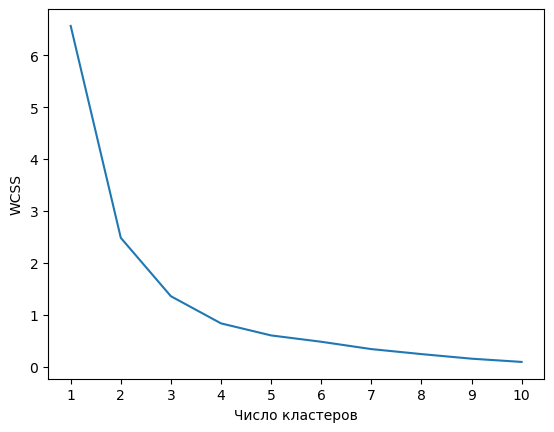

In [20]:
new_data = generate_2d_data(15)
show_scatter_2d(new_data)
wcss = []
for n in range(1,11):
    k_means = KMeans(n_clusters=n)
    predict = k_means.fit_predict(new_data)
    
    # вычисление wcss для k-means
    wcss.append(k_means.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xlabel('Число кластеров')
plt.xticks(range(1,11))
plt.ylabel('WCSS')
plt.show()


## ARI and NMI (когда есть данные истинных меток)

Существует показатели, которые можно использовать для оценки 
результатов с точки зрения истинной кластеризации. Наиболее важными 
среди них являются скорректированный **коэффициент Рэнда** (adjusted
Rand index, **ARI**) и **нормализованная взаимная информация** (normalized 
mutual information, **NMI**), которые представляют собой количественные
показатели. Они принимают значения, близкие к 0, при случайном
назначении кластеров, и значение 1, когда полученные результаты 
кластеризации полностью совпадают с фактическими (обратите 
внимание, скорректированный коэффициент Рэнда может принимать 
значения от -1 до 1).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1 2 0 0 2 0 0 0 1 2 0 0 0 0 2 2 1 1 2 0 0 1 2 0 1 0 2 2 2 2 2 1 2 1 1 0 0
 1 1 1 2 0 0 2 1 1 1 2 0 0 1 0 0 1 1 0 1 1 2 1 1 2 2 2 1 2 0 0 2 1 0 1 2 0
 1 1 2 0 2 2]


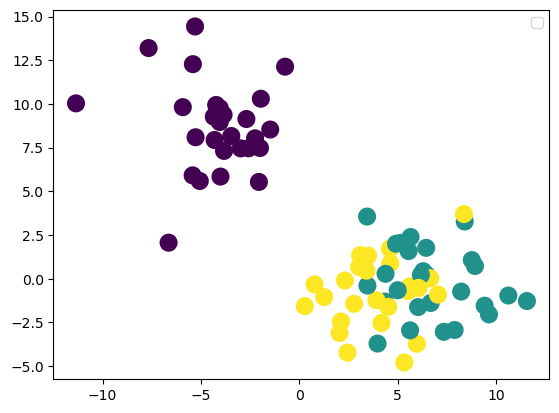

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Adjusted Rand Index: 0.5901197281846619


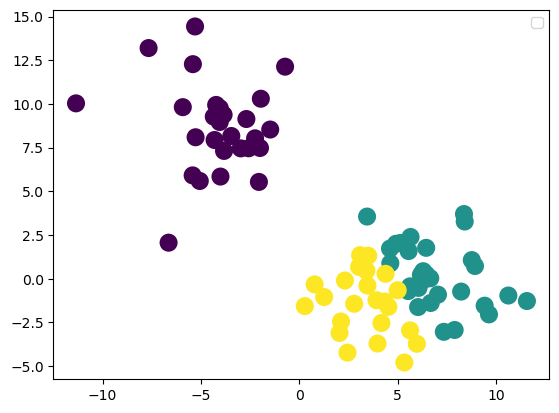

In [21]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Создаем случайные данные с известными метками кластеров
X, true_labels = make_blobs(n_samples=80, centers=3, cluster_std=2)
print(true_labels)
show_scatter_2d(X, labels=true_labels)


# Предположим, что мы используем KMeans для кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_labels = kmeans.fit_predict(X)

# Используем метрику adjusted_rand_score для оценки схожести меток
ari_score = adjusted_rand_score(true_labels, predicted_labels)

print(f"Adjusted Rand Index: {ari_score}")
show_scatter_2d(X, labels=predicted_labels)

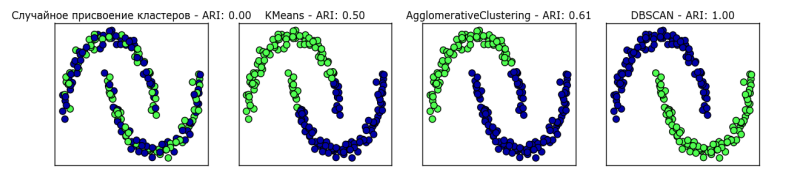

*Если бы мы знали, как выглядит правильная кластеризация
данных, мы могли бы использовать эту информацию, чтобы построить
модель контролируемого обучения типа классификатора. Поэтому, 
использование таких показателей, как ARI и NMI, как правило, помогает 
в разработке алгоритмов, но не в оценке их эффективности с точки 
зрения конкретного применения*

### Оценка результатов кластеризации без знания истинных меток 

Существуют метрики кластеризации, которые не требуют знания
истинных результатов кластеризации, например, силуэтный 
коэффициент (**silhouette coefficient**). Однако на практике они работают 
плохо. Силуэтная мера вычисляет компактность кластера, более высокое 
значение соответствует лучшему результату, идеальное значение равно 1. 
Несмотря на то, что компактные кластеры удобны, компактность не 
предполагает сложных форм

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


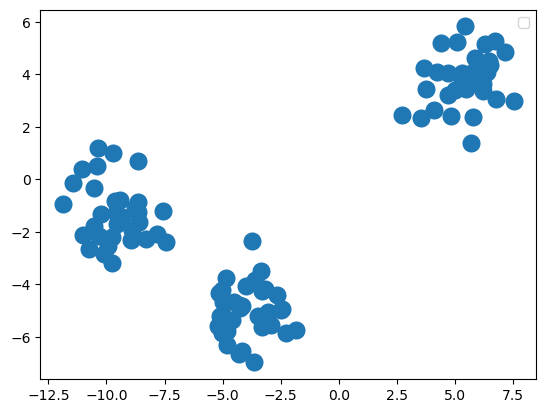

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


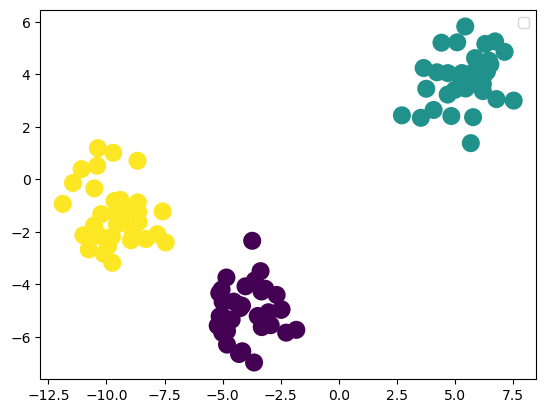

Silhouette Score: 0.7652705184687043


In [22]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.datasets import make_blobs

# Создаем случайные данные с известными метками кластеров
X, true_labels = make_blobs(n_samples=100, centers=3)

# Предположим, что мы используем KMeans для кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_labels = kmeans.fit_predict(X)

show_scatter_2d(X)
show_scatter_2d(X, labels=predicted_labels)


# Используем метрику silhouette_score для оценки качества кластеризации
silhouette_avg = silhouette_score(X, predicted_labels)

print(f"Silhouette Score: {silhouette_avg}")


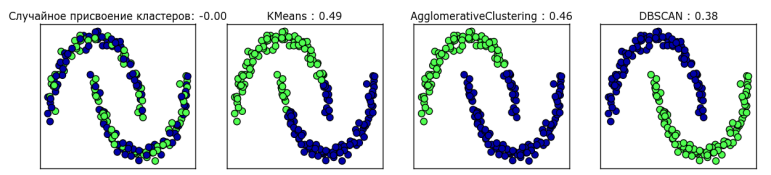

*Можно увидеть, что алгоритм k-средних получает самое высокое
значение силуэтного коэффициента, хотя мы, возможно, предпочтем
результаты, полученные с помощью алгоритма DBSCAN*. 

----------
Чуть более
лучшая стратегия для оценки результатов кластеризации заключается в 
использовании метрик кластеризации на основе *робастности* **(robustnessbased clustering metrics)**.
Эти метрики запускают алгоритм после добавления некоторого шума в данные или применяют различные
настройки параметров, а затем сравнивают полученные результаты. Идея 
заключается в том, что если разные значения параметров и разные
возмущения данных возвращают один и тот же результат, ему, вероятно, 
можно доверять. (где их найти?)

                                             # ДЗ САМОМУ СЕБЕ

*Руководство для специалистов по работе с данными (2016)  Автор: Андреас Мюллер, Сара Гвидo (глава про кластеризацию)*
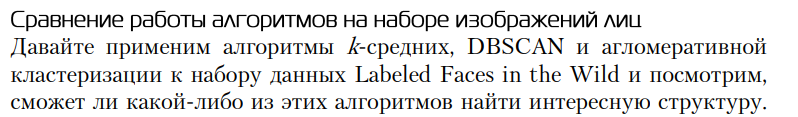

## Вместо вывода

Каждый из алгоритмов имеет свои преимущества. Алгоритм **k-средних** позволяет описывать кластеры с помощью их средних значений. 
Кроме того, его можно рассматривать как декомпозиционный метод, в 
котором каждая точка данных представлена центром кластера. **DBSCAN** 
позволяет определить «шумовые точки», которые не присвоены ни 
одному кластеру, и он может помочь автоматически определить 
количество кластеров. В отличие от двух остальных методов он 
допускает наличие кластеров сложной формы, как мы уже видели на
примере набора данных two_moons. Иногда DBSCAN выделяет кластеры,
сильно отличающиеся по своим размерам, что может быть как 
недостатком, так и преимуществом этого алгоритма. **Агломеративная 
кластеризация** позволяет построить исчерпывающую иерархию 
возможных разбиений данных, которую можно легко исследовать с 
помощью дендрограмм.

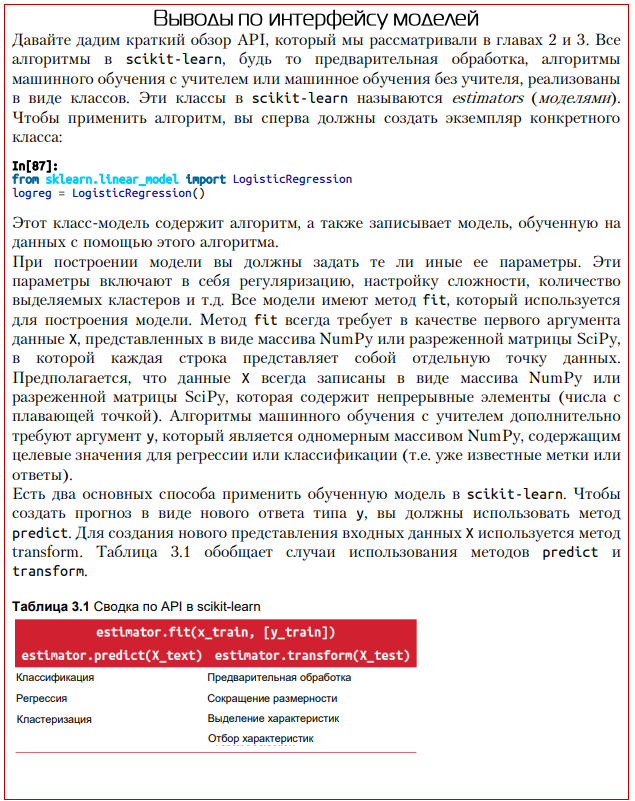